In [328]:
## CSCI 4150U - Data Mining - Lab 4 (German dataset)
# Name: Thinh Le
# Student ID: 100741899

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import fmean
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [330]:
headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'Class']
data = pd.read_csv('./data1/german.data', header=None, names=headers, delimiter=' ')
data

A1  A2   A3   A4    A5   A6   A7  A8   A9   A10  ...   A12 A13   A14  \
0    A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1    A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2    A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3    A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4    A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   
..   ...  ..  ...  ...   ...  ...  ...  ..  ...   ...  ...   ...  ..   ...   
995  A14  12  A32  A42  1736  A61  A74   3  A92  A101  ...  A121  31  A143   
996  A11  30  A32  A41  3857  A61  A73   4  A91  A101  ...  A122  40  A143   
997  A14  12  A32  A43   804  A61  A75   4  A93  A101  ...  A123  38  A143   
998  A11  45  A32  A43  1845  A61  A73   4  A93  A101  ...  A124  23  A143   
999  A12  45  A34  A41  4576  A62  A71   3  A93  A101  ...  A123  27  A143   

      A15 A16   A17 A18   A19   A20 Class  
0    A152   2  A173   1  A192  A201     1  
1    A152   1  A173   1  A191  A201     2  
2    A152   1  A172   2  A191  A201     1  
3    A153   1  A173   2  A191  A201     1  
4    A153   2  A173   2  A191  A201     2  
..    ...  ..   ...  ..   ...   ...   ...  
995  A152   1  A172   1  A191  A201     1  
996  A152   1  A174   1  A192  A201     1  
997  A152   1  A173   1  A191  A201     1  
998  A153   1  A173   1  A192  A201     2  
999  A152   1  A173   1  A191  A201     1  

[1000 rows x 21 columns]

In [331]:
# Create instance of labelencoder
labelencoder = LabelEncoder()
# Assign numerical values and storing in another column
for col in data.select_dtypes(include=['object']).columns.tolist():
    data[col + '_N'] = labelencoder.fit_transform(data[col])
    data.drop(columns=[col], inplace=True)
data

A2    A5  A8  A11  A13  A16  A18  Class  A1_N  A3_N  ...  A6_N  A7_N  \
0     6  1169   4    4   67    2    1      1     0     4  ...     4     4   
1    48  5951   2    2   22    1    1      2     1     2  ...     0     2   
2    12  2096   2    3   49    1    2      1     3     4  ...     0     3   
3    42  7882   2    4   45    1    2      1     0     2  ...     0     3   
4    24  4870   3    4   53    2    2      2     0     3  ...     0     2   
..   ..   ...  ..  ...  ...  ...  ...    ...   ...   ...  ...   ...   ...   
995  12  1736   3    4   31    1    1      1     3     2  ...     0     3   
996  30  3857   4    4   40    1    1      1     0     2  ...     0     2   
997  12   804   4    4   38    1    1      1     3     2  ...     0     4   
998  45  1845   4    4   23    1    1      2     0     2  ...     0     2   
999  45  4576   3    4   27    1    1      1     1     4  ...     1     0   

     A9_N  A10_N  A12_N  A14_N  A15_N  A17_N  A19_N  A20_N  
0       2      0      0      2      1      2      1      0  
1       1      0      0      2      1      2      0      0  
2       2      0      0      2      1      1      0      0  
3       2      2      1      2      2      2      0      0  
4       2      0      3      2      2      2      0      0  
..    ...    ...    ...    ...    ...    ...    ...    ...  
995     1      0      0      2      1      1      0      0  
996     0      0      1      2      1      3      1      0  
997     2      0      2      2      1      2      0      0  
998     2      0      3      2      2      2      1      0  
999     2      0      2      2      1      2      0      0  

[1000 rows x 21 columns]

In [332]:
# Normalize the data
class_col = data['Class']
data.drop(columns=['Class'], inplace=True)
cols = data.columns
scaler = MinMaxScaler()
d = scaler.fit_transform(data)
data = pd.DataFrame(d, columns=cols)
data['Class'] = class_col
data

A2        A5        A8       A11       A13       A16  A18  \
0    0.029412  0.050567  1.000000  1.000000  0.857143  0.333333  0.0   
1    0.647059  0.313690  0.333333  0.333333  0.053571  0.000000  0.0   
2    0.117647  0.101574  0.333333  0.666667  0.535714  0.000000  1.0   
3    0.558824  0.419941  0.333333  1.000000  0.464286  0.000000  1.0   
4    0.294118  0.254209  0.666667  1.000000  0.607143  0.333333  1.0   
..        ...       ...       ...       ...       ...       ...  ...   
995  0.117647  0.081765  0.666667  1.000000  0.214286  0.000000  0.0   
996  0.382353  0.198470  1.000000  1.000000  0.375000  0.000000  0.0   
997  0.117647  0.030483  1.000000  1.000000  0.339286  0.000000  0.0   
998  0.602941  0.087763  1.000000  1.000000  0.071429  0.000000  0.0   
999  0.602941  0.238032  0.666667  1.000000  0.142857  0.000000  0.0   

         A1_N  A3_N      A4_N  ...  A7_N      A9_N  A10_N     A12_N  A14_N  \
0    0.000000  1.00  0.444444  ...  1.00  0.666667    0.0  0.000000    1.0   
1    0.333333  0.50  0.444444  ...  0.50  0.333333    0.0  0.000000    1.0   
2    1.000000  1.00  0.777778  ...  0.75  0.666667    0.0  0.000000    1.0   
3    0.000000  0.50  0.333333  ...  0.75  0.666667    1.0  0.333333    1.0   
4    0.000000  0.75  0.000000  ...  0.50  0.666667    0.0  1.000000    1.0   
..        ...   ...       ...  ...   ...       ...    ...       ...    ...   
995  1.000000  0.50  0.333333  ...  0.75  0.333333    0.0  0.000000    1.0   
996  0.000000  0.50  0.111111  ...  0.50  0.000000    0.0  0.333333    1.0   
997  1.000000  0.50  0.444444  ...  1.00  0.666667    0.0  0.666667    1.0   
998  0.000000  0.50  0.444444  ...  0.50  0.666667    0.0  1.000000    1.0   
999  0.333333  1.00  0.111111  ...  0.00  0.666667    0.0  0.666667    1.0   

     A15_N     A17_N  A19_N  A20_N  Class  
0      0.5  0.666667    1.0    0.0      1  
1      0.5  0.666667    0.0    0.0      2  
2      0.5  0.333333    0.0    0.0      1  
3      1.0  0.666667    0.0    0.0      1  
4      1.0  0.666667    0.0    0.0      2  
..     ...       ...    ...    ...    ...  
995    0.5  0.333333    0.0    0.0      1  
996    0.5  1.000000    1.0    0.0      1  
997    0.5  0.666667    0.0    0.0      1  
998    1.0  0.666667    1.0    0.0      2  
999    0.5  0.666667    0.0    0.0      1  

[1000 rows x 21 columns]

In [333]:
Y = data['Class']
X = data.drop(columns=['Class'])

In [334]:
k = 5
clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

In [335]:
# k-NN
# Perform evaluation 5 times
fmeasures = []
times = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    start = time.time()
    Y_pred = clf.predict(X_test)
    end = time.time()
    times.append(end - start)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_test, Y_pred))
# Calculate average f-measure
print('F-measure: ', fmeasures)
print('Avg. F-measure: ', fmean(fmeasures))
print('Test times: ', times)
print('Avg test time: ', fmean(times))
fmeasures_knn = fmeasures
fmeasures_knn.append(fmean(fmeasures))
times_knn = times
times_knn.append(fmean(times))

F-measure:  [0.8157894736842104, 0.7500000000000001, 0.75, 0.8356164383561644, 0.8079470198675497]
Avg. F-measure:  0.7918705863815849
Test times:  [0.007000446319580078, 0.0060002803802490234, 0.0069997310638427734, 0.005999088287353516, 0.006999492645263672]
Avg test time:  0.006599807739257812


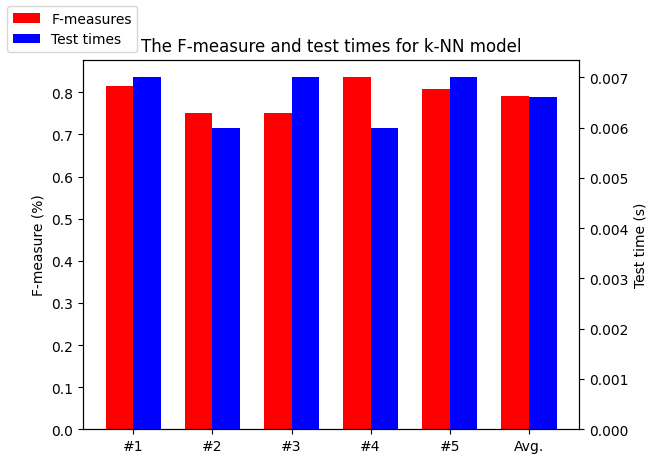

In [336]:
# Plot the F-measure and test times for k-NN model
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, fmeasures_knn, width, label='F-measures', color='red')
rects2 = ax2.bar(x + width/2, times_knn, width, label='Test times', color='blue')
ax.set_ylabel('F-measure (%)')
ax2.set_ylabel('Test time (s)')
ax.set_title('The F-measure and test times for k-NN model')
ax.set_xticks(x, labels)
fig.legend(loc='upper left')
plt.show()

In [337]:
clf = DecisionTreeClassifier()

In [338]:
# Decision Tree
# Perform evaluation 5 times
fmeasures = []
times = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    start = time.time()
    Y_pred = clf.predict(X_test)
    end = time.time()
    times.append(end - start)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_test, Y_pred))
# Calculate average f-measure
print('F-measure: ', fmeasures)
print('Avg. F-measure: ', fmean(fmeasures))
print('Test times: ', times)
print('Avg test time: ', fmean(times))
fmeasures_tree = fmeasures
fmeasures_tree.append(fmean(fmeasures))
times_tree = times
times_tree.append(fmean(times))

F-measure:  [0.725925925925926, 0.7142857142857142, 0.7681159420289856, 0.7801418439716311, 0.759124087591241]
Avg. F-measure:  0.7495187027606995
Test times:  [0.0009992122650146484, 0.0009996891021728516, 0.0, 0.0, 0.0]
Avg test time:  0.0003997802734375


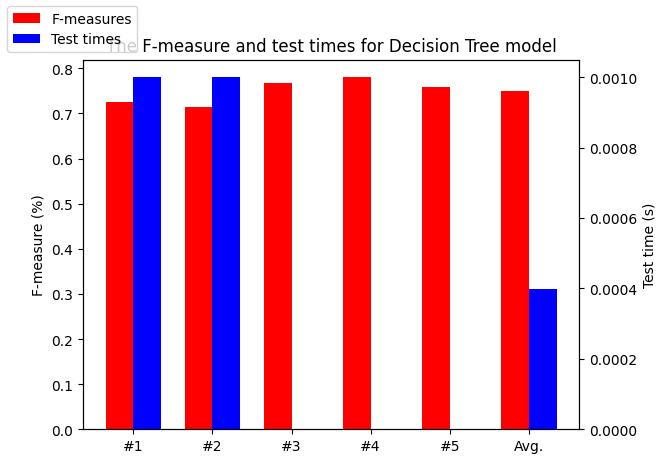

In [339]:
# Plot the F-measure and test times for Decision Tree model
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, fmeasures_tree, width, label='F-measures', color='red')
rects2 = ax2.bar(x + width/2, times_tree, width, label='Test times', color='blue')
ax.set_ylabel('F-measure (%)')
ax2.set_ylabel('Test time (s)')
ax.set_title('The F-measure and test times for Decision Tree model')
ax.set_xticks(x, labels)
fig.legend(loc='upper left')
plt.show()

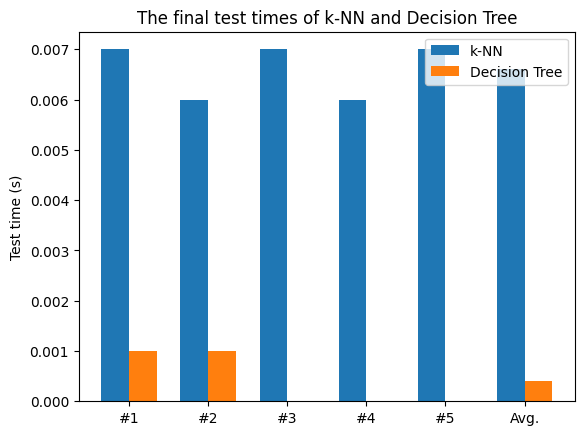

In [340]:
# Compare the final test times of k-NN and Decision Tree
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, times_knn, width, label='k-NN')
rects2 = ax.bar(x + width/2, times_tree, width, label='Decision Tree')
ax.set_ylabel('Test time (s)')
ax.set_title('The final test times of k-NN and Decision Tree')
ax.set_xticks(x, labels)
plt.legend(loc='upper right')
plt.show()

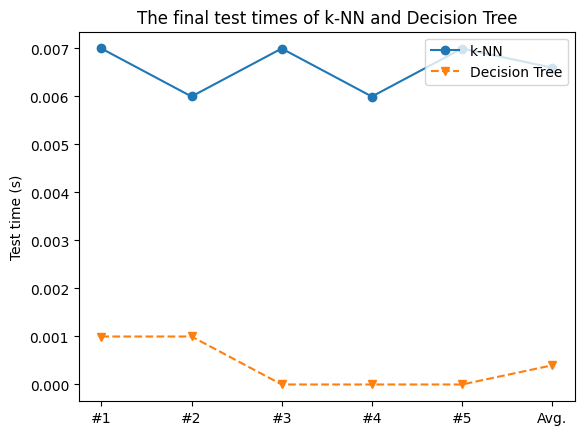

In [341]:
# Compare the final test times of k-NN and Decision Tree
plt.plot(labels, times_knn, 'o-', labels, times_tree, 'v--')
plt.ylabel('Test time (s)')
plt.title('The final test times of k-NN and Decision Tree')
plt.legend(['k-NN', 'Decision Tree'], loc='upper right')
plt.show()

In [342]:
# The plots above show that Decision Tree model has significantly
#   faster test time compared to k-NN model given the same dataset

In [343]:
# Compare the final F-measures of k-NN and Decision Tree
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fmeasures_knn, width, label='k-NN')
rects2 = ax.bar(x + width/2, fmeasures_tree, width, label='Decision Tree')
ax.set_ylabel('F-measure (%)')
ax.set_title('The final F-measure of k-NN and Decision Tree')
ax.set_xticks(x, labels)
plt.legend(loc='upper right')
plt.show()

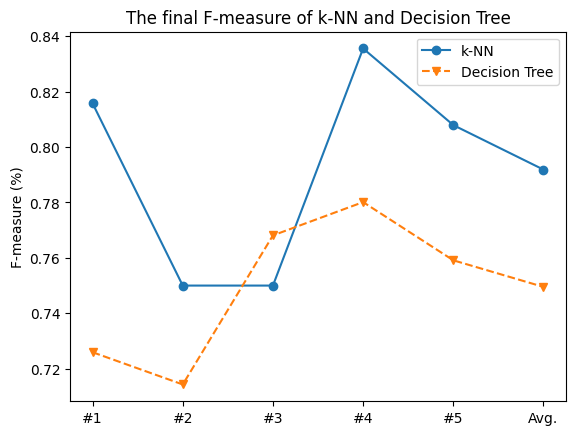

In [344]:
# Compare the final F-measures of k-NN and Decision Tree
plt.plot(labels, fmeasures_knn, 'o-', labels, fmeasures_tree, 'v--')
plt.ylabel('F-measure (%)')
plt.title('The final F-measure of k-NN and Decision Tree')
plt.legend(['k-NN', 'Decision Tree'], loc='upper right')
plt.show()

In [345]:
# The plots above show that Decision Tree model has slightly
#   lower F-measure compared to k-NN model given the same dataset

In [346]:
# Build the k-NN model using the train data set and 
#   select the best k based on F-measure on the validation set
numNeighbors = [1, 2, 3, 4, 5]
fmeasures = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Split validation set from training set
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_val)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_val, Y_pred))
# Calculate average f-measure
print('F-measure: ', fmeasures)
fmeasures_knn = fmeasures

F-measure:  [1.0, 0.8676470588235293, 0.9253731343283582, 0.8529411764705882, 0.8307692307692308]


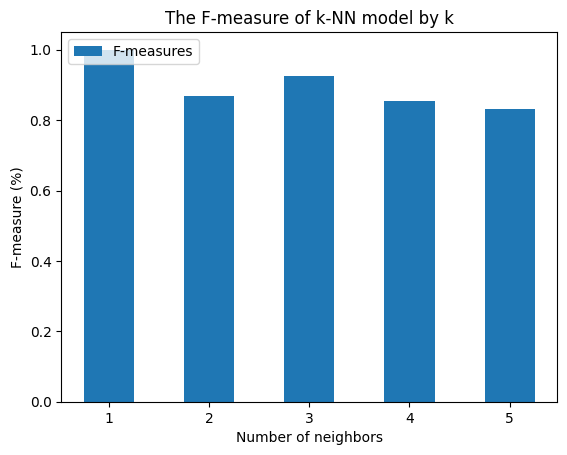

In [347]:
# Plot the F-measure of k-NN model by k
x = np.arange(len(numNeighbors))  # the label locations
fig, ax = plt.subplots()
width = 0.5  # the width of the bars
rect = ax.bar(x, fmeasures_knn, width, label='F-measures')
ax.set_ylabel('F-measure (%)')
ax.set_xlabel('Number of neighbors')
ax.set_title('The F-measure of k-NN model by k')
ax.set_xticks(x, numNeighbors)
ax.legend(loc='upper left')
plt.show()

In [348]:
# Build the Decision Tree model using the train data set and 
#   select the best depth based on F-measure on the validation set
depths = [3, 4, 5, 6, 7, 8, 9, 10]
fmeasures = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Split validation set from training set
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_val)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_val, Y_pred))
# Calculate average f-measure
print('F-measure: ', fmeasures)
fmeasures_tree = fmeasures

F-measure:  [0.8175182481751825, 0.7910447761194029, 0.8811188811188813, 0.909090909090909, 0.883720930232558, 0.9354838709677418, 0.9365079365079364, 0.9649122807017544]


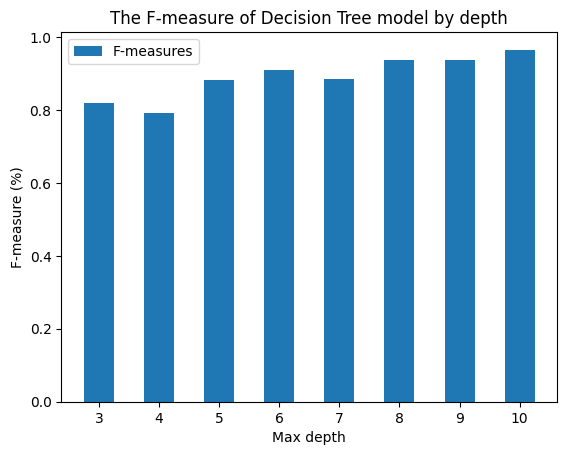

In [349]:
# Plot the F-measure of Decision Tree model by depth
x = np.arange(len(depths))  # the label locations
fig, ax = plt.subplots()
width = 0.5  # the width of the bars
rect = ax.bar(x, fmeasures_tree, width, label='F-measures')
ax.set_ylabel('F-measure (%)')
ax.set_xlabel('Max depth')
ax.set_title('The F-measure of Decision Tree model by depth')
ax.set_xticks(x, depths)
ax.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'F-measure (%)')

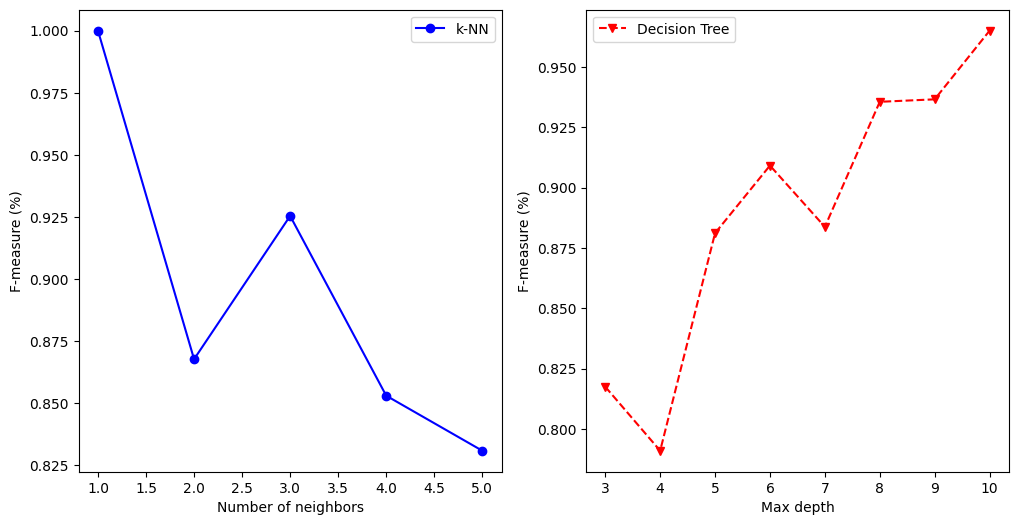

In [350]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(numNeighbors, fmeasures_knn, 'bo-')
ax1.legend(['k-NN'])
ax1.set_xlabel('Number of neighbors')
ax1.set_ylabel('F-measure (%)')
ax2.plot(depths, fmeasures_tree,'rv--')
ax2.legend(['Decision Tree'])
ax2.set_xlabel('Max depth')
ax2.set_ylabel('F-measure (%)')

In [351]:
# The plots above show that k-NN and Decision Tree model
#   has opposite behavior
# k-NN decreases in F-measure when the model becomes more
#   complex (increases number of neighbors)
#   -> the best k would be k=1
# Decision Tree increases in F-measure when the model becomes
#   more complex (increases max depths)